# Installations


In [ ]:
!pip install segmentation-models-pytorch
!pip install -U git+https://github.com/albu/albumentations --no-cache-dir
#!pip install "torch==1.7.0"  # segmentation-models-pytorch uses torch._six

# Imports

In [ ]:
import os
from google.colab import drive
drive.mount('/content/drive')
#from shutil import copyfile

#copyfile('/content/drive/Shared drives/ITK Ultrasound Consultation/Zoé_szakdolgozat/colab notebooks/train.py', '/usr/local/lib/python3.7/dist-packages/segmentation_models_pytorch/utils/train.py')
import numpy as np
import cv2
import matplotlib.pyplot as plt
import torch
import albumentations as albu
import segmentation_models_pytorch as smp

from torch.utils.data import DataLoader
from torch.utils.data import Dataset as BaseDataset

Mounted at /content/drive


In [ ]:
all_inputs_dir = '/content/drive/Shared drives/ITK Ultrasound Consultation/Zoé_szakdolgozat/data/other_imaging_modalities/images'
all_targets_dir = '/content/drive/Shared drives/ITK Ultrasound Consultation/Zoé_szakdolgozat/data/other_imaging_modalities/style transfer images'

#Creating sets

In [ ]:

all_inputs = [name for name in os.listdir(all_inputs_dir) 
  if((name.endswith('cropped.png') and (name.startswith('co') or name.startswith('dr')))#cortex,draminski cropped kell
  or not (name.startswith('co') or name.startswith('dr'))) and not name.startswith('hi')]
all_outputs = [name for name in os.listdir(all_targets_dir) 
  if((name.endswith('cropped.png') and (name.startswith('co') or name.startswith('dr')))#cortex,draminski cropped kell
  or not (name.startswith('co') or name.startswith('dr'))) and not name.startswith('hi')]

for img_name in all_inputs:
  if img_name not in all_outputs:
    all_inputs.remove(img_name)

all_inputs.sort()
all_outputs.sort()
# Ezt majd megcsinálom rendesen, egyelőre legyen random
train_idx = np.random.choice(range(len(all_inputs)), round(0.6*len(all_inputs)), False)
train_idx.sort()
train_inputs = []
valid_inputs = []
test_inputs = []
remains = []
for i in range(len(all_inputs)):
  if i not in train_idx:
    remains.append(i)
  else:
    train_inputs.append(all_inputs[i])
    #train_outputs.append(all_inputs[i])
valid_idx = np.random.choice(remains, round(len(remains)/2), False)
for i in range(len(all_inputs)):
  if i in valid_idx:
    valid_inputs.append(all_inputs[i])
    #valid_outputs.append(all_inputs[i])
  elif i not in train_idx:
    test_inputs.append(all_inputs[i])
    #test_outputs.append(all_inputs[i]
train_inputs.sort()
valid_inputs.sort()
test_inputs.sort()

with open(os.path.join(set_names_dir,'training_set.txt'), 'w') as f:
  for img_name in train_inputs:
    f.write(img_name)
    f.write('\n')
with open(os.path.join(set_names_dir,'validation_set.txt'), 'w') as f:
  for img_name in valid_inputs:
    f.write(img_name)
    f.write('\n')
with open(os.path.join(set_names_dir,'test_set.txt'), 'w') as f:
  for img_name in test_inputs:
    f.write(img_name)
    f.write('\n')

NameError: ignored

#Data paths

In [ ]:
# This will prompt for authorization.
#drive.mount('/content/drive')


set_names_dir = '/content/drive/Shared drives/ITK Ultrasound Consultation/Zoé_szakdolgozat/colab notebooks/sets_for_unet'

train_inputs = []
valid_inputs = []
test_inputs = []

with open(os.path.join(set_names_dir,'training_set.txt'),'r') as f:
  lines = f.readlines()
  for line in lines:
    train_inputs.append(line.strip())
with open(os.path.join(set_names_dir,'validation_set.txt'),'r') as f:
  lines = f.readlines()
  for line in lines:
    valid_inputs.append(line.strip())
with open(os.path.join(set_names_dir,'test_set.txt'),'r') as f:
  lines = f.readlines()
  for line in lines:
    test_inputs.append(line.strip())
print(train_inputs)
print(valid_inputs)
print(test_inputs)

"""
# original
in_train_dir = '/content/drive/My Drive/Tooth dataset/Phantom/Train/CBCT'
# desired output
out_train_dir = '/content/drive/My Drive/Tooth dataset/Phantom/Train/THRESH MCT'

in_valid_dir = '/content/drive/My Drive/Tooth dataset/Phantom/Validation/CBCT'
out_valid_dir = '/content/drive/My Drive/Tooth dataset/Phantom/Validation/THRESH MCT'

in_test_dir = '/content/drive/My Drive/Tooth dataset/Phantom/Test/CBCT'
out_test_dir = '/content/drive/My Drive/Tooth dataset/Phantom/Test/THRESH MCT'

#/usr/local/lib/python3.7/dist-packages/segmentation_models_pytorch/utils/train.py
"""

def visualize(**images):
    #PLot images in one row.
    n = len(images)
    plt.figure(figsize=(16, 5))
    for i, (name, image) in enumerate(images.items()):
        plt.subplot(1, n, i + 1)
        plt.xticks([])
        plt.yticks([])
        plt.title(' '.join(name.split('_')).title())
        plt.imshow(image)
    plt.show()


['co_10_NEVUS_cropped.png', 'co_11_NEVUS_cropped.png', 'co_1_NEVUS_cropped.png', 'co_8_NEVUS_cropped.png', 'co_9_NEVUS_cropped.png', 'dr_1_UNKNOWN_cropped.png', 'dr_3_UNKNOWN_cropped.png', 'dr_4_UNKNOWN_cropped.png', 'dr_5_UNKNOWN_cropped.png', 'dr_6_UNKNOWN_cropped.png', 'dr_7_UNKNOWN_cropped.png', 'dr_8_UNKNOWN_cropped.png', 'ha_13_BCC.png', 'ha_13_BCC_dark.png', 'ha_15_BCC.png', 'ha_18_BCC_dark.png', 'ha_1_NEVUS.png', 'ha_1_NEVUS_dark.png', 'ha_23_MELA.png', 'ha_24_MELA_dark.png', 'ha_26_MELA.png', 'ha_28_MELA.png', 'ha_3_NEVUS_dark.png', 'ha_5_NEVUS.png', 'ha_5_NEVUS_dark.png', 'ha_6_NEVUS.png', 'ss_12_UNKNOWN.png', 'ss_2_UNKNOWN.png', 'ss_3_UNKNOWN.png', 'ss_5_UNKNOWN.png', 'ss_6_UNKNOWN.png', 'ss_7_UNKNOWN.png']
['co_2_NEVUS_cropped.png', 'co_4_NEVUS_cropped.png', 'ha_18_BCC.png', 'ha_23_MELA_dark.png', 'ha_26_MELA_dark.png', 'ha_28_MELA_dark.png', 'ha_3_NEVUS.png', 'ss_10_UNKNOWN.png', 'ss_11_UNKNOWN.png', 'ss_4_UNKNOWN.png', 'ss_9_UNKNOWN.png']
['co_3_NEVUS_cropped.png', 'co_5_

# Data structure

(858, 3558, 3) (858, 3558)


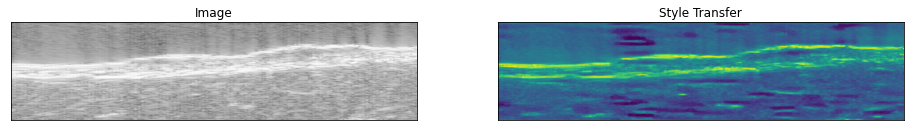

In [ ]:
class Dataset(BaseDataset):
    """ Read images, apply augmentation and preprocessing transformations.
    
    Args:
        images_dir (str): path to images folder
        masks_dir (str): path to segmentation masks folder
        class_values (list): values of classes to extract from segmentation mask
        augmentation (albumentations.Compose): data transfromation pipeline 
            (e.g. flip, scale, etc.)
        preprocessing (albumentations.Compose): data preprocessing 
            (e.g. noralization, shape manipulation, etc.)
    
    """
    
    #CLASSES = ['dentin']
    def __init__(
            self, 
            images_dir, 
            style_transfer_dir, 
            images_list, 
            classes=None, 
            augmentation=None, 
            preprocessing=None,
    ):
        
        self.ids = images_list #os.listdir(images_dir)
        self.images_fps = [os.path.join(images_dir, image_id) for image_id in self.ids]
        self.style_tr_fps = [os.path.join(style_transfer_dir, image_id) for image_id in self.ids]
       
        
        
        self.augmentation = augmentation
        self.preprocessing = preprocessing
    
    def __getitem__(self, i):
        
        # read data
        image = cv2.imread(self.images_fps[i])
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) #rgb
        style_tr = cv2.imread(self.style_tr_fps[i],0)
        #style_tr = cv2.cvtColor(style_tr, cv2.COLOR_BGR2RGB)
        
        # apply augmentations
        if self.augmentation:
            sample = self.augmentation(image=image, mask=style_tr)
            image, style_tr = sample['image'], sample['mask']
        
        # apply preprocessing
        if self.preprocessing:
            sample = self.preprocessing(image=image, mask=style_tr)
            image, style_tr = sample['image'], sample['mask']
        
        #assert image.shape == style_tr.shape, str(image.shape)+' '+str(style_tr.shape)
        return image, style_tr
        
    def __len__(self):
        return len(self.ids)

# Lets look at data we have

dataset = Dataset(all_inputs_dir, all_targets_dir,train_inputs)

image, style_tr = dataset[20] # get some sample   
print(image.shape, style_tr.shape)
visualize(
    image=image, 
    style_transfer = style_tr,
)


#Augmentation

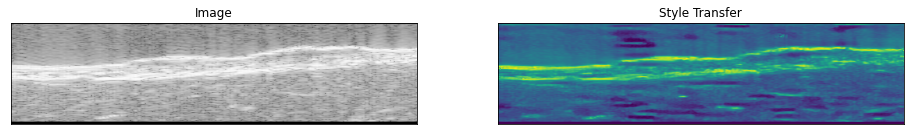

In [ ]:

def get_training_augmentation():
    train_transform = [
        albu.LongestMaxSize(max_size=512,always_apply=True),
        albu.PadIfNeeded(min_height=None, min_width=None, pad_height_divisor=32, pad_width_divisor=32,always_apply=True,border_mode=0),
        #albu.PadIfNeeded(min_height=320, min_width=320, always_apply=True, border_mode=0),
        #albu.RandomCrop(height=320, width=320, always_apply=True),
    ]
    return albu.Compose(train_transform)
def get_validation_augmentation():
    """Add paddings to make image shape divisible by 32"""
    test_transform = [
        albu.LongestMaxSize(max_size=512,always_apply=True),
        albu.PadIfNeeded(min_height=None, min_width=None, pad_height_divisor=32, pad_width_divisor=32, always_apply=True, border_mode=0),
        #albu.PadIfNeeded(min_height=320, min_width=320, always_apply=True, border_mode=0),
    ]
    return albu.Compose(test_transform)


def to_tensor(x, **kwargs):
    if len(x.shape) != 3:
      x = np.expand_dims(x,2)
    return x.transpose(2, 0, 1).astype('float32')


def get_preprocessing(preprocessing_fn):
    """Construct preprocessing transform
    
    Args:
        preprocessing_fn (callable): data normalization function 
            (can be specific for each pretrained neural network)
    Return:
        transform: albumentations.Compose
    
    """
    
    _transform = [
        albu.Lambda(image=preprocessing_fn),
        albu.Lambda(image=to_tensor, mask=to_tensor),
    ]
    return albu.Compose(_transform)


#### Visualize resulted augmented images and masks

augmented_dataset = Dataset(
    all_inputs_dir, 
    all_targets_dir,
    train_inputs,
    augmentation=get_training_augmentation(), 
    #classes=['dentin'],
)

# same image with different random transforms
#for i in range(10):
image, mask = augmented_dataset[20]
visualize(image=image, style_transfer=mask)


# Create model and train

In [ ]:
ENCODER = 'densenet121'
ENCODER_WEIGHTS = 'imagenet'
ACTIVATION = 'identity'#'sigmoid' # could be None for logits or 'softmax2d' for multiclass segmentation
DEVICE =  torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(DEVICE)

# create segmentation model with pretrained encoder
model = smp.UnetPlusPlus(
    encoder_name=ENCODER, 
    encoder_weights=ENCODER_WEIGHTS, 
    #classes=len(CLASSES), 
    classes = 1,
    activation=ACTIVATION,
)
#model = torch.load('/content/drive/MyDrive/best_model_phantom_dentin.pth')

preprocessing_fn = smp.encoders.get_preprocessing_fn(ENCODER, ENCODER_WEIGHTS)



#print(my_model)

train_dataset = Dataset(
    all_inputs_dir, 
    all_targets_dir, 
    train_inputs,
    augmentation=get_training_augmentation(), 
    preprocessing=get_preprocessing(preprocessing_fn),
    #classes=CLASSES,
)

valid_dataset = Dataset(
    all_inputs_dir,
    all_targets_dir,
    valid_inputs, 
    augmentation=get_validation_augmentation(), 
    preprocessing=get_preprocessing(preprocessing_fn),
    #classes=CLASSES,
)

# 4-es batch_size esetén nem működik
train_loader = DataLoader(train_dataset, batch_size=1, shuffle=True, num_workers=2) #4,2
valid_loader = DataLoader(valid_dataset, batch_size=1, shuffle=False, num_workers=2) #1, 2

loss = smp.utils.losses.MSELoss()
metrics = [
    #smp.utils.metrics.IoU(threshold=0.5),
    smp.utils.metrics.IoU(threshold=None),
]

#loss = torch.nn.MSELoss()
#loss = torch.nn.L1Loss()
optimizer = torch.optim.Adam([ 
    dict(params=model.parameters(), lr=1e-4), #0.0001
])

# create epoch runners 
# it is a simple loop of iterating over dataloader`s samples
train_epoch = smp.utils.train.TrainEpoch(
    model, 
    loss=loss, 
    metrics=metrics, 
    optimizer=optimizer,
    device=DEVICE,
    verbose=True,
)

valid_epoch = smp.utils.train.ValidEpoch(
    model, 
    loss=loss, 
    metrics=metrics, 
    device=DEVICE,
    verbose=True,
)



In [ ]:
with open('model.txt','w') as f:
  for layer in model.children():
    f.write(str(layer)+'\n')

# Training

In [ ]:

for i in range(40):
    
    print('\nEpoch: {}'.format(i))
    train_logs = train_epoch.run(train_loader)
    valid_logs = valid_epoch.run(valid_loader)



Epoch: 0
valid: 100%|██████████| 11/11 [00:10<00:00,  1.01it/s, mse_loss - 8.943e+03, iou_score - -3.456]

Epoch: 1
valid: 100%|██████████| 11/11 [00:03<00:00,  3.17it/s, mse_loss - 8.877e+03, iou_score - 2.099]

Epoch: 2
valid: 100%|██████████| 11/11 [00:03<00:00,  3.04it/s, mse_loss - 8.712e+03, iou_score - -32.51]

Epoch: 3
valid: 100%|██████████| 11/11 [00:03<00:00,  3.07it/s, mse_loss - 8.704e+03, iou_score - -1.805]

Epoch: 4
valid: 100%|██████████| 11/11 [00:03<00:00,  2.99it/s, mse_loss - 8.704e+03, iou_score - 0.3572]

Epoch: 5
valid: 100%|██████████| 11/11 [00:03<00:00,  3.03it/s, mse_loss - 8.66e+03, iou_score - -3.402]

Epoch: 6
valid: 100%|██████████| 11/11 [00:03<00:00,  3.07it/s, mse_loss - 8.551e+03, iou_score - -1.702]

Epoch: 7
valid: 100%|██████████| 11/11 [00:03<00:00,  3.09it/s, mse_loss - 8.588e+03, iou_score - -1.82]

Epoch: 8
valid: 100%|██████████| 11/11 [00:03<00:00,  3.07it/s, mse_loss - 8.512e+03, iou_score - -1.706]

Epoch: 9
valid: 100%|██████████| 11/11 

#Test

In [ ]:
# load best saved checkpoint
#best_model = torch.load('/content/drive/MyDrive/best_model_phantom_dentin.pth')

# create test dataset
test_dataset = Dataset(
    all_inputs_dir, 
    all_targets_dir,
    test_inputs, 
    augmentation=get_validation_augmentation(), 
    preprocessing=get_preprocessing(preprocessing_fn),
    #classes=CLASSES,
)

test_dataloader = DataLoader(test_dataset)

# evaluate model on test set
test_epoch = smp.utils.train.ValidEpoch(
    model=model,
    loss=loss,
    metrics=metrics,
    device=DEVICE,
)

logs, _ = test_epoch.run(test_dataloader)

valid: 100%|██████████| 11/11 [00:16<00:00,  1.46s/it, mse_loss - 6.573e+03, iou_score - -1.072]


Write predictions to file

In [ ]:
# load best saved checkpoint
#best_model = torch.load('/content/drive/MyDrive/best_model_phantom_dentin.pth')

# create test dataset
test_dataset = Dataset(
    all_inputs_dir, 
    all_targets_dir,
    test_inputs, 
    augmentation=get_validation_augmentation(), 
    preprocessing=get_preprocessing(preprocessing_fn),
    #classes=CLASSES,
)
output_folder = '/content/drive/Shared drives/ITK Ultrasound Consultation/Zoé_szakdolgozat/data/Unet'
for n in range(len(test_dataset)):
    image,_ = test_dataset[n]
    
    x_tensor = torch.from_numpy(image).to(DEVICE).unsqueeze(0)
    pr_mask = model.predict(x_tensor)
    pr_mask = pr_mask.squeeze().cpu().numpy().round()
    filename = test_dataset.ids[n][0:-4]
    print(filename)

    cv2.imwrite(os.path.join(output_folder,test_dataset.ids[n]), pr_mask)

co_3_NEVUS_cropped
co_5_NEVUS_cropped
co_6_NEVUS_cropped
co_7_NEVUS_cropped
dr_2_UNKNOWN_cropped
dr_9_UNKNOWN_cropped
ha_15_BCC_dark
ha_24_MELA
ha_6_NEVUS_dark
ss_1_UNKNOWN
ss_8_UNKNOWN


#ez nem kell

mean:  0.7993929626012632
[2 0 0 1 3 0 0 0 0 5]
[52. 56. 61. 66. 71. 75. 80. 85. 90. 94. 99.]


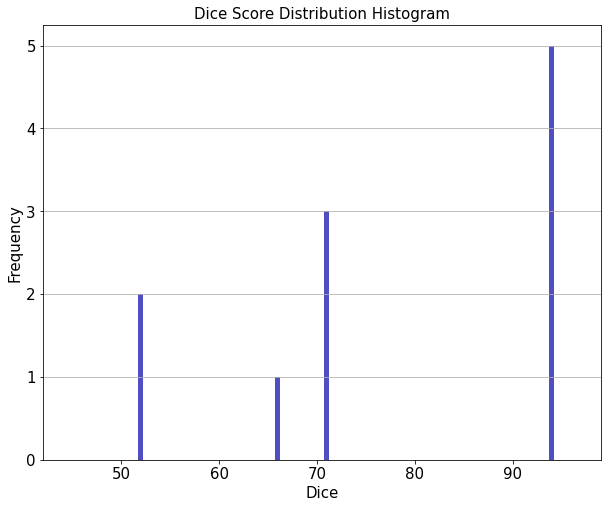

In [ ]:
# dataset without transformations for image visualization
def dice(im1, im2):
    
    im1 = np.asarray(im1).astype(np.bool)
    im2 = np.asarray(im2).astype(np.bool)

    if im1.shape != im2.shape:
        print(im1.shape, im2.shape)
        raise ValueError("Shape mismatch: im1 and im2 must have the same shape.")

    #if both 0
    if not (im1.any()) and not (im2.any()):
        return 1

    # Compute Dice coefficient
    intersection = np.logical_and(im1, im2)

    return 2. * intersection.sum() / (im1.sum() + im2.sum())


test_dataset_vis = Dataset(
    all_inputs_dir, all_targets_dir, test_inputs 
    #classes=['dentin'],
)

dicearray =np.zeros((1,len(test_dataset)))

for n in range(len(test_dataset)):
    #n = np.random.choice(len(test_dataset))
    image_vis = test_dataset_vis[n][0].astype('uint8')
    image, gt_mask = test_dataset[n]
    #gt_mask = test_dataset_vis[n][1].astype('uint8')
    
    #gt_mask = cv2.resize(gt_mask.squeeze(),(800,416))
    gt_mask = gt_mask.squeeze()
    x_tensor = torch.from_numpy(image).to(DEVICE).unsqueeze(0)
    pr_mask = model.predict(x_tensor)
    pr_mask = (pr_mask.squeeze().cpu().numpy().round())
    
    """
    visualize(
        image=image_vis, 
        ground_truth_mask=gt_mask, 
        predicted_mask=pr_mask
    )
    """
    dicearray[0,n]=dice(pr_mask,gt_mask)
    #print(dicearray[0,n])


print('mean: ',np.mean(dicearray))
hist,bin_edges = np.histogram(dicearray*100,bins=10)
plt.figure(figsize=[10,8])

bin_edges = np.round(bin_edges,0)
print(hist)
print(bin_edges)

plt.bar(bin_edges[:-1], hist, width = 0.5, color='#0504aa',alpha=0.7)
plt.xlim(min(bin_edges)-10, max(bin_edges))
plt.grid(axis='y', alpha=1)
plt.xlabel('Dice',fontsize=15)
plt.ylabel('Frequency',fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.ylabel('Frequency',fontsize=15)
plt.title('Dice Score Distribution Histogram',fontsize=15)
plt.show()

#ez kell

In [ ]:
# test dataset without transformations for image visualization
test_dataset_vis = Dataset(
    all_inputs_dir, 
    all_targets_dir, 
    test_inputs, 
    #classes=CLASSES,
)

#for i in range(25):
#    n = np.random.choice(len(test_dataset))
for n in range(len(test_dataset)):    
    image_vis = test_dataset_vis[n][0].astype('uint8')
    image, gt_mask = test_dataset[n] #gt_mask augmented...
    gt_mask = test_dataset_vis[n][1].astype('uint8')
    
    #gt_mask = gt_mask[:,:,0].squeeze()
    
    x_tensor = torch.from_numpy(image).to(DEVICE).unsqueeze(0)
    pr_mask = model.predict(x_tensor)
    pr_mask = pr_mask.squeeze().cpu().numpy().round()
    print(np.amax(pr_mask))
    #print(pr_mask.shape, gt_mask.shape)
    visualize(
        image=image_vis, 
        target=gt_mask, 
        prediction=pr_mask
    )